In [1]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

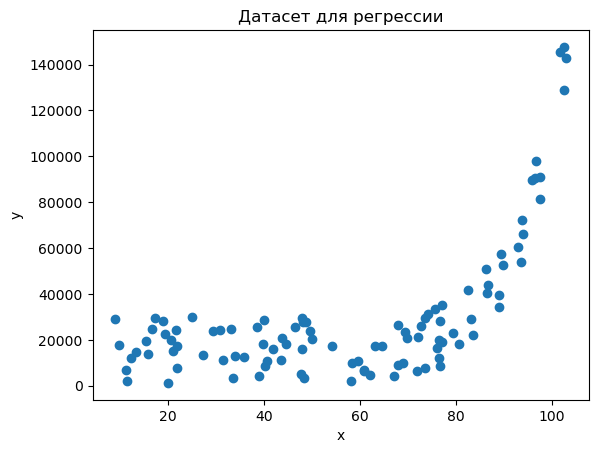

In [27]:
# Загрузка данных для регрессии
data_reg = pd.read_csv("C:/users/senpai_sqrt2/Desktop/Uni/3rd course/ML/ML_course/ML3.1 polynomial features/data/gen_regression.csv")
X_reg = data_reg[['x']]
y_reg = data_reg['y']

# Визуализация данных
plt.scatter(X_reg, y_reg)
plt.title("Датасет для регрессии")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

C:\Users\senpai_sqrt2\AppData\Local\Temp\ipykernel_22136\992130732.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xx = np.arange(X_reg.min()[0], X_reg.max()[0]).reshape(-1, 1)
C:\Users\senpai_sqrt2\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


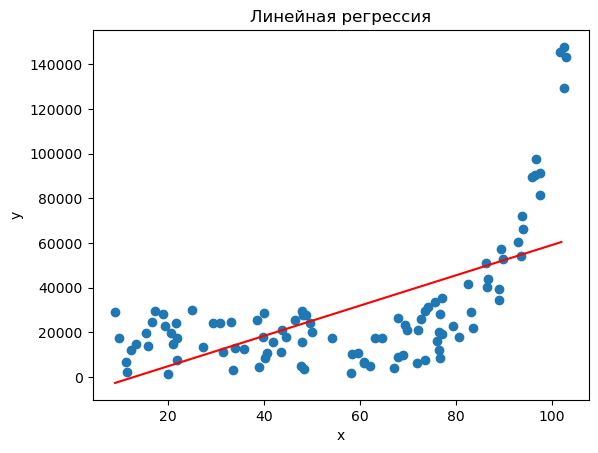

R² score: 0.37467360318911636


In [29]:
# Линейная регрессия
linear = LinearRegression().fit(X_reg, y_reg)

xx = np.arange(X_reg.min()[0], X_reg.max()[0]).reshape(-1, 1)
yy = linear.predict(xx)

plt.scatter(X_reg, y_reg)
plt.plot(xx, yy, c='r')
plt.title("Линейная регрессия")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

print("R² score:", linear.score(X_reg, y_reg))

C:\Users\senpai_sqrt2\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


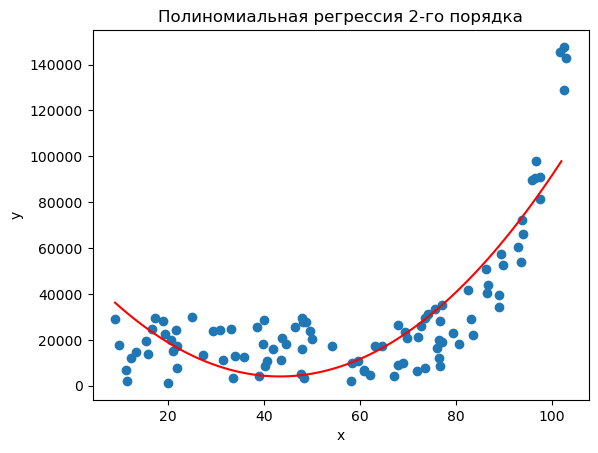

R² score: 0.7359753787024842


In [31]:
# Полиномиальная регрессия 2-го порядка
transformation = PolynomialFeatures(degree=2)
X_2 = transformation.fit_transform(X_reg)

poly_2d = LinearRegression().fit(X_2, y_reg)

xx_2d = transformation.transform(xx)
yy_2d = poly_2d.predict(xx_2d)

plt.scatter(X_reg, y_reg)
plt.plot(xx, yy_2d, c='r')
plt.title("Полиномиальная регрессия 2-го порядка")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

print("R² score:", poly_2d.score(X_2, y_reg))

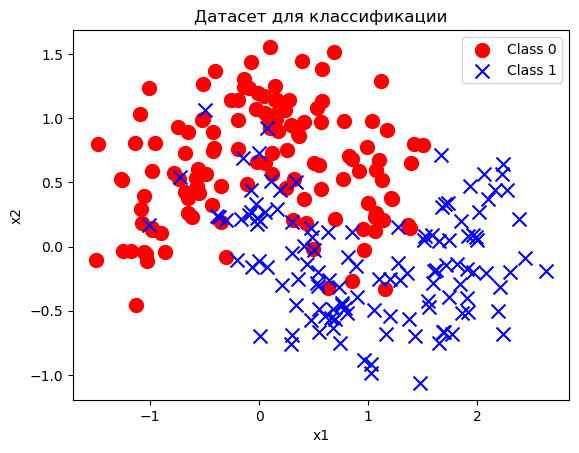

In [33]:
# Классификация - загрузка данных
data_class = pd.read_csv("C:/users/senpai_sqrt2/Desktop/Uni/3rd course/ML/ML_course/ML3.1 polynomial features/data/gen_classification.csv", index_col=0)
y_class = data_class['y']
X_class = data_class.drop(["y"], axis=1)

# Визуализация данных
plt.scatter(X_class.iloc[:, 0][y_class==0], X_class.iloc[:, 1][y_class==0], marker="o", c='r', s=100, label="Class 0")
plt.scatter(X_class.iloc[:, 0][y_class==1], X_class.iloc[:, 1][y_class==1], marker="x", c='b', s=100, label="Class 1")
plt.title("Датасет для классификации")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

C:\Users\senpai_sqrt2\AppData\Local\Temp\ipykernel_22136\1627300049.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.arange(X_class.min()[0], X_class.max()[0]+0.1, 0.01),
C:\Users\senpai_sqrt2\AppData\Local\Temp\ipykernel_22136\1627300049.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.arange(X_class.min()[1], X_class.max()[1]+0.1, 0.01))
C:\Users\senpai_sqrt2\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


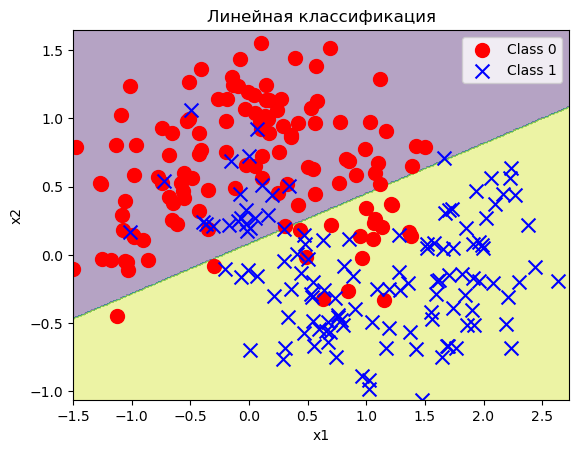

Accuracy: 0.832


In [35]:
# Линейная классификация
logistic = LogisticRegression().fit(X_class, y_class)

xx, yy = np.meshgrid(
    np.arange(X_class.min()[0], X_class.max()[0]+0.1, 0.01),
    np.arange(X_class.min()[1], X_class.max()[1]+0.1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel())))

Z = logistic.predict(XX).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_class.iloc[:, 0][y_class==0], X_class.iloc[:, 1][y_class==0], marker="o", c='r', s=100, label="Class 0")
plt.scatter(X_class.iloc[:, 0][y_class==1], X_class.iloc[:, 1][y_class==1], marker="x", c='b', s=100, label="Class 1")
plt.title("Линейная классификация")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

print("Accuracy:", logistic.score(X_class, y_class))

C:\Users\senpai_sqrt2\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


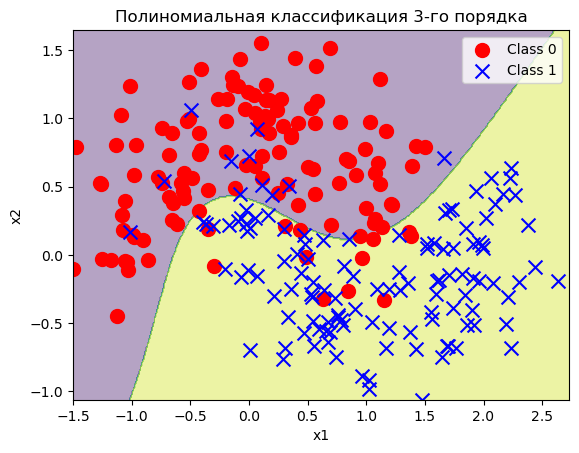

Accuracy: 0.9


In [37]:
# Полиномиальная классификация 3-го порядка
class_transform = PolynomialFeatures(degree=3, include_bias=False)
X_3 = class_transform.fit_transform(X_class)

class_3 = LogisticRegression().fit(X_3, y_class)

Z = class_3.predict(class_transform.transform(XX)).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_class.iloc[:, 0][y_class==0], X_class.iloc[:, 1][y_class==0], marker="o", c='r', s=100, label="Class 0")
plt.scatter(X_class.iloc[:, 0][y_class==1], X_class.iloc[:, 1][y_class==1], marker="x", c='b', s=100, label="Class 1")
plt.title("Полиномиальная классификация 3-го порядка")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

print("Accuracy:", class_3.score(X_3, y_class))

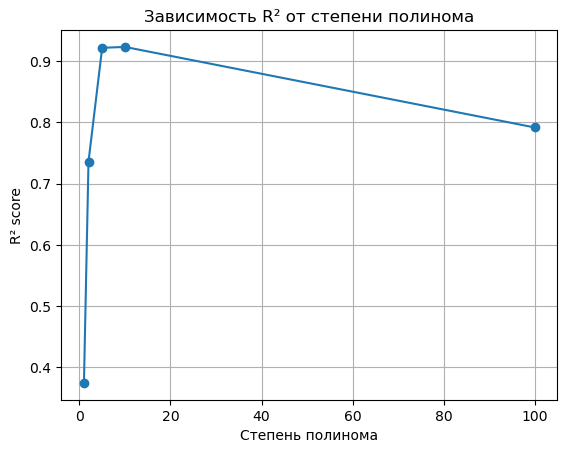

Степени полиномов и соответствующие R² scores:
Degree 1: R² = 0.3747
Degree 2: R² = 0.7360
Degree 5: R² = 0.9217
Degree 10: R² = 0.9232
Degree 100: R² = 0.7917


In [39]:
# Дополнительно: тестирование разных степеней полинома для регрессии
degrees = [1, 2, 5, 10, 100]
scores = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_reg)
    model = LinearRegression().fit(X_poly, y_reg)
    score = model.score(X_poly, y_reg)
    scores.append(score)
    
plt.plot(degrees, scores, 'o-')
plt.title("Зависимость R² от степени полинома")
plt.xlabel("Степень полинома")
plt.ylabel("R² score")
plt.grid()
plt.show()

print("Степени полиномов и соответствующие R² scores:")
for deg, scr in zip(degrees, scores):
    print(f"Degree {deg}: R² = {scr:.4f}")

In [41]:
data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")
data_kc_prices.shape

(21613, 21)

In [43]:
data_kc_prices.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [45]:
y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)

In [47]:
X_kc_prices.shape, y_kc_prices.shape

((21613, 18), (21613,))

In [49]:
reg_kc_multiple = LinearRegression().fit(X_kc_prices, y_kc_prices)
reg_kc_multiple.score(X_kc_prices, y_kc_prices)

0.6997471890109157

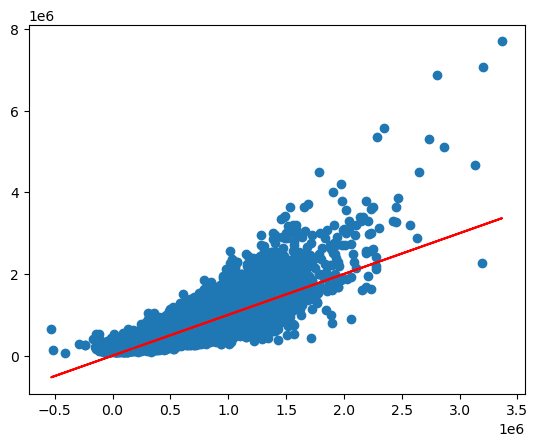

In [51]:
y_pred_kc_prices = reg_kc_multiple.predict(X_kc_prices)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')

In [53]:
X_3_kc_prices = (poly_features_kc_prices := PolynomialFeatures(degree=3)).fit_transform(X_kc_prices)

In [55]:
X_3_kc_prices.shape

(21613, 1330)

In [57]:
reg_poly2_kc = LinearRegression().fit(X_3_kc_prices, y_kc_prices)
reg_poly2_kc.score(X_3_kc_prices, y_kc_prices)

0.864837934727624